In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)



Mounted at /content/gdrive


In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *

# Import Data

In [4]:
input_path = '/content/drive/MyDrive/'
from google.colab import drive
drive.mount('/content/drive')

reviews_df = pd.read_parquet(f'/content/drive/MyDrive/UserAnimeList.parquet', columns=['username', 'anime_id', 'my_score'])
print(len(reviews_df))
reviews_df = reviews_df.head(20000000)

reviews_df.head()

Mounted at /content/drive
80076112


,username,anime_id,my_score
0,karthiga,21,9
1,karthiga,59,7
2,karthiga,74,7
3,karthiga,120,7
4,karthiga,178,7


In [15]:
users_df = pd.read_csv(f'/content/drive/MyDrive/UserList.csv')

reviews_df = pd.merge(reviews_df, users_df[['user_id', 'username']], on="username")
reviews_df.head()

,username,anime_id,my_score,user_id
0,karthiga,21,9,2255153
1,karthiga,59,7,2255153
2,karthiga,74,7,2255153
3,karthiga,120,7,2255153
4,karthiga,178,7,2255153


In [ ]:
from fastai.collab import *
cont_names = ["anime_id", "user_id"]
dls = CollabDataLoaders.from_df(reviews_df[['anime_id', 'user_id', 'my_score']], cont_names=cont_names, y_names="my_score", bs=64, metrics=error_rate)
learn = collab_learner(dls, y_range=(0.0,10.0))

## Collab Learners

In [ ]:
#learn.fine_tune(8)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,time
0,9.727009,9.992293,17:59
1,9.241283,9.285313,17:37
2,8.849549,9.154233,17:38


In [ ]:
learn.export('anime_recommender_model') 

In [ ]:
# Try learn.export() and then learn = load_learner(path). Then you can learn.predict() whatever target data you need to in production. See https://docs.fast.ai/tutorial.inference.html 

In [ ]:
learn.predict()

TypeError: ignored

In [ ]:
learn

In [ ]:
Learner.predict(2255153)

TypeError: ignored

In [ ]:
learn.get_preds()

(tensor([3.5385, 7.8499, 6.3235,  ..., 0.0283, 0.5207, 5.6397]), tensor([[ 0],
         [10],
         [ 7],
         ...,
         [ 0],
         [ 0],
         [ 5]], dtype=torch.int8))

In [ ]:
#https://jovian.ai/adrianmallett-ne/movielens-fastai

# Another way

In [ ]:
#pip install fastai

In [6]:
from fastai.collab import * 
 

In [ ]:
#data = CollabDataBunch.from_df(reviews_df)

In [7]:
input_path = '/content/drive/MyDrive/'
from google.colab import drive
drive.mount('/content/drive')

reviews_df = pd.read_parquet(f'/content/drive/MyDrive/UserAnimeList.parquet', columns=['username', 'anime_id', 'my_score'])
reviews_df = reviews_df.head(20000000)

cont_names = ["anime_id"]
cat_names = ['username']
dls = CollabDataLoaders.from_df(reviews_df, cont_names=cont_names, cat_names = cat_names, y_names="my_score", bs=64, metrics=error_rate)
learn = collab_learner(dls, y_range=(0.0,10.0))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SuggestedLRs(valley=7.585775892948732e-05)

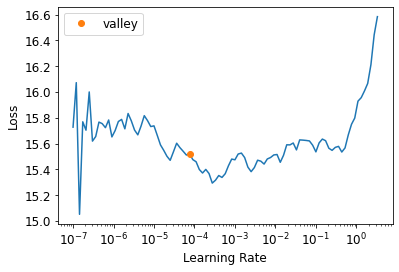

In [9]:
learn.lr_find()
#learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_one_cycle(3, 0.0000013)

epoch,train_loss,valid_loss,time
0,15.439952,15.542334,46:47
